In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Install matplotlib if not already installed
file_path = 'PsychopyRawData1.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

df.columns = df.columns.str.replace(r'survey.block_(\d)', r'v\1', regex=True)
df.columns = df.columns.str.replace(r'/question', 'q', regex=True)
df.columns = df.columns.str.replace(r'addiction', '', regex=True)
# Sum the addiction survey answers and add the result as a new column
df['Addiction'] = df[['v5q1', 'v5q2', 'v5q3', 'v5q4', 'v5q5', 'v5q6', 'v5q7', 'v5q8', 'v5q9', 'v5q10', 'v5q11', 'v5q12', 'v5q13', 'v5q14', 'v5q15', 'v5q16', 'v5q17']].sum(axis=1)
#remove individual questions 
df = df[df.columns.drop(list(df.filter(regex='v5')))]

#remove rows with nan values 
df = df.dropna()

csv_file_path = 'AnswerKey.csv'
# Load the CSV file into a DataFrame
df_csv = pd.read_csv(csv_file_path)
# Strip 'd1', 'd2', 'd3', 'd4' from each column name
df_csv.columns = df_csv.columns.str.replace(r'd[1-4]', '', regex=True)
# Remove duplicate columns
df_csv = df_csv.loc[:, ~df_csv.columns.duplicated()]

# Iterate over each row in df
for index, row in df.iterrows():
    # Iterate over each column in df
    for col in df.columns:
        # Check if the column name matches the format vxdy
        if col.startswith('v') and col[2] == 'q':
            # Compare the value in df with the corresponding value in df_csv
            if row[col] == df_csv.at[0, col]:
                df.at[index, col] = True
            else:
                df.at[index, col] = False
                

#sum percent correct for each video 
for i in range(1, 5):
    df[f'v{i}'] = df[[f'v{i}q{j}' for j in range(1, 8)]].sum(axis=1)  / 7 * 100

df = df[df.columns.drop(list(df.filter(regex='v[1-4]q')))]

# Renumber the index
df.reset_index(drop=True, inplace=True)
# Display the DataFrame
df

,participant,orderID,Addiction,v1,v2,v3,v4
0,995736,6,50.0,71.428571,71.428571,42.857143,57.142857
1,984606,11,47.0,85.714286,57.142857,71.428571,71.428571
2,937799,16,54.0,57.142857,71.428571,85.714286,42.857143
3,936156,6,52.0,100.0,85.714286,85.714286,57.142857
4,927753,11,45.0,85.714286,57.142857,71.428571,57.142857
5,905293,13,55.0,57.142857,42.857143,57.142857,57.142857
6,881405,8,44.0,85.714286,14.285714,42.857143,42.857143
7,862822,1,52.0,85.714286,100.0,85.714286,71.428571
8,819252,4,56.0,71.428571,100.0,71.428571,57.142857
9,752891,3,54.0,100.0,100.0,85.714286,57.142857


In [2]:
import numpy as np

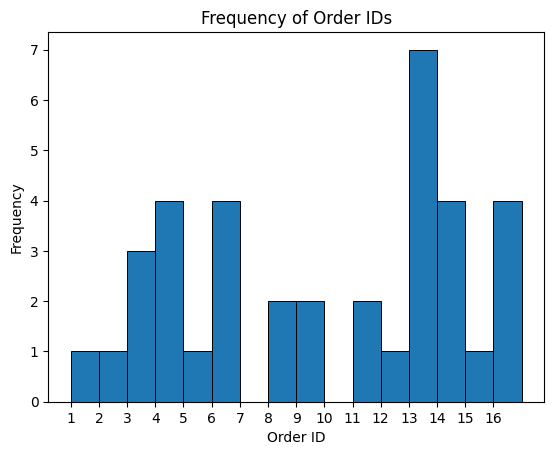

In [3]:
plt.yticks(range(0, 8, 1))
plt.xticks(range(1, 17, 1))
plt.hist(df['orderID'], bins=range(1, 18), align='mid', edgecolor='black', linewidth=0.7)
plt.xlabel('Order ID')
plt.ylabel('Frequency')
plt.title('Frequency of Order IDs')
plt.show()

As can be seem in the above graph, the orders of video + distractor pairs were not evenly distributed among participants. 

In [4]:
from scipy.stats import shapiro

# List of columns to test
columns_to_test = ['v1', 'v2', 'v3', 'v4']

# Perform the Shapiro-Wilk test for each column
for col in columns_to_test:
    stat, p_value = shapiro(df[col].astype(float))
    print(f'Shapiro-Wilk Test for {col}: Statistics={stat:.3f}, p-value={p_value:.3f}')
    if p_value > 0.05:
        print(f'{col} looks Gaussian (fail to reject H0)')
    else:
        print(f'{col} does not look Gaussian (reject H0)')

Shapiro-Wilk Test for v1: Statistics=0.885, p-value=0.001
v1 does not look Gaussian (reject H0)
Shapiro-Wilk Test for v2: Statistics=0.811, p-value=0.000
v2 does not look Gaussian (reject H0)
Shapiro-Wilk Test for v3: Statistics=0.903, p-value=0.004
v3 does not look Gaussian (reject H0)
Shapiro-Wilk Test for v4: Statistics=0.872, p-value=0.001
v4 does not look Gaussian (reject H0)


In [5]:
from scipy.stats import kruskal

# Perform the Kruskal-Wallis H-test
stat, p_value = kruskal(df['v1'], df['v2'], df['v3'], df['v4'])

# Print the results
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

# Interpret the result
if p_value > 0.05:
    print('Samples are from the same distribution (fail to reject H0)')
else:
    print('Samples are from different distributions (reject H0)')

Statistics=26.091, p=0.000
Samples are from different distributions (reject H0)


This shows that the participants scored significantly better or worse for 1 or more of the videos.

In [6]:
from scikit_posthocs import posthoc_dunn

# Perform Dunn's test
posthoc_results = posthoc_dunn([df['v1'].astype(float), df['v2'].astype(float), df['v3'].astype(float), df['v4'].astype(float)], p_adjust='bonferroni')

# Print the results
print(posthoc_results)

          1         2         3         4
1  1.000000  1.000000  0.252118  0.000071
2  1.000000  1.000000  0.251273  0.000070
3  0.252118  0.251273  1.000000  0.113386
4  0.000071  0.000070  0.113386  1.000000


The results of the post hoc test show that scores for video 1 and 2 were significantly different to video 4. There was no significant difference between the scores for video 3 and the other videos. This tells us that the difficulty of the questions for the videos was not consistent.

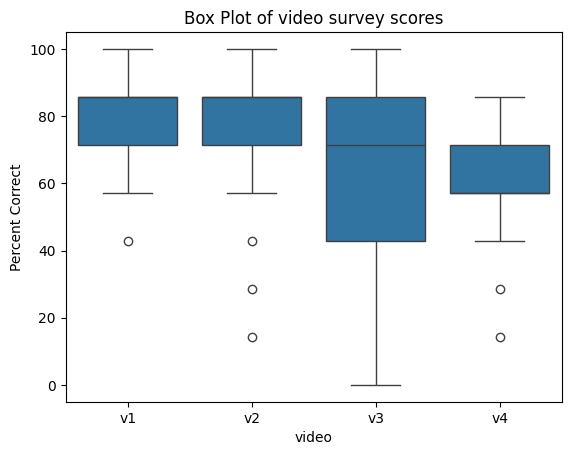

       Median Lower Quartile Upper Quartile  Median equals Quartile
v1  85.714286      71.428571      85.714286                    True
v2  85.714286      71.428571      85.714286                    True
v3  71.428571      42.857143      85.714286                   False
v4  57.142857      57.142857      71.428571                    True


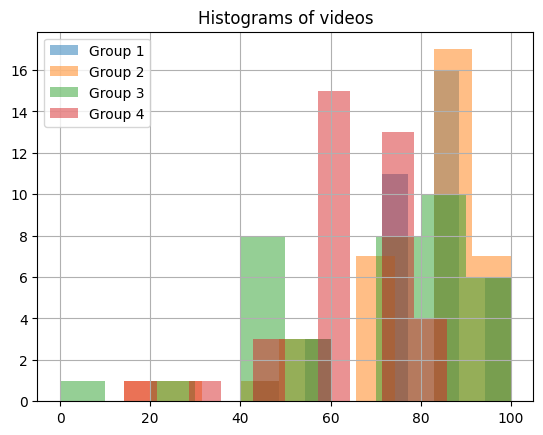

In [7]:
import seaborn as sns

# Melt the DataFrame to long format for seaborn
df_melted = df.melt(id_vars=['participant', 'orderID', 'Addiction'], value_vars=['v1', 'v2', 'v3', 'v4'], var_name='video', value_name='Percent Correct')

# Box Plot
sns.boxplot(x='video', y='Percent Correct', data=df_melted, linewidth=1)
plt.title('Box Plot of video survey scores')
plt.show()

# Show descriptive statistics for the value column
median_values = df[['v1', 'v2', 'v3', 'v4']].median()
quartiles = df[['v1', 'v2', 'v3', 'v4']].quantile([0.25, 0.75])

# Create a DataFrame to hold the statistics
stats_df = pd.DataFrame({
    'Median': median_values,
    'Lower Quartile': quartiles.loc[0.25],
    'Upper Quartile': quartiles.loc[0.75],
    'Median equals Quartile': median_values.eq(quartiles.loc[0.25]) | median_values.eq(quartiles.loc[0.75])
})

print(stats_df)

# Histograms
df['v1'].hist(alpha=0.5, label='Group 1')
df['v2'].hist(alpha=0.5, label='Group 2')
df['v3'].hist(alpha=0.5, label='Group 3')
df['v4'].hist(alpha=0.5, label='Group 4')
plt.legend()
plt.title('Histograms of videos')
plt.show()

The plots above allow us to visually inspect the distribution of scores for each video. As we can see video 4 is the only one where no one scored 100%. These findings indicate that the questions for video 4 were more difficult than for the other videos. 

The median is equal to the quartile for 3 of the videos which is why the median line is not visible in 3 of the box plots. 

In [8]:
# Calculate the average of v1, v2, v3, and v4 across the orderIDs
average_scores = df.groupby('orderID')[['v1', 'v2', 'v3', 'v4']].mean()
# Display the result
average_scores

,v1,v2,v3,v4
orderID,,,,
1,85.714286,100.0,85.714286,71.428571
2,85.714286,85.714286,85.714286,85.714286
3,80.952381,80.952381,61.904762,61.904762
4,71.428571,89.285714,57.142857,39.285714
5,85.714286,100.0,100.0,57.142857
6,82.142857,75.0,64.285714,53.571429
8,78.571429,21.428571,42.857143,50.0
9,71.428571,85.714286,50.0,64.285714
11,85.714286,57.142857,71.428571,64.285714


In [9]:
# Reshape the DataFrame to long format
df_long = df.melt(id_vars=['orderID'], value_vars=['v1', 'v2', 'v3', 'v4'], 
                  var_name='variable', value_name='score')

df_long['score'] = pd.to_numeric(df_long['score'], errors='coerce')
df_long = df_long.dropna(subset=['score'])

print(df_long)


     orderID variable       score
0          6       v1   71.428571
1         11       v1   85.714286
2         16       v1   57.142857
3          6       v1  100.000000
4         11       v1   85.714286
..       ...      ...         ...
143       13       v4   71.428571
144       13       v4   57.142857
145        4       v4   14.285714
146       16       v4   57.142857
147       13       v4   57.142857

[148 rows x 3 columns]


In [10]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for each row across columns v1, v2, v3, and v4
for index, row in average_scores.iterrows():
    stat, p_value = shapiro(row[['v1', 'v2', 'v3', 'v4']].astype(float))
    printString= f'Row {index}: Shapiro-Wilk Test: Statistics={stat:.3f}, p-value={p_value:.3f}'
    if p_value > 0.05:
        print(printString + f'looks Gaussian (fail to reject H0)')
    else:
        print(printString + f'does not look Gaussian (reject H0)')

Row 1: Shapiro-Wilk Test: Statistics=0.945, p-value=0.683looks Gaussian (fail to reject H0)
Row 2: Shapiro-Wilk Test: Statistics=1.000, p-value=1.000looks Gaussian (fail to reject H0)
Row 3: Shapiro-Wilk Test: Statistics=0.729, p-value=0.024does not look Gaussian (reject H0)
Row 4: Shapiro-Wilk Test: Statistics=0.998, p-value=0.995looks Gaussian (fail to reject H0)
Row 5: Shapiro-Wilk Test: Statistics=0.827, p-value=0.161looks Gaussian (fail to reject H0)
Row 6: Shapiro-Wilk Test: Statistics=0.979, p-value=0.894looks Gaussian (fail to reject H0)
Row 8: Shapiro-Wilk Test: Statistics=0.980, p-value=0.900looks Gaussian (fail to reject H0)
Row 9: Shapiro-Wilk Test: Statistics=0.998, p-value=0.995looks Gaussian (fail to reject H0)
Row 11: Shapiro-Wilk Test: Statistics=0.971, p-value=0.850looks Gaussian (fail to reject H0)
Row 12: Shapiro-Wilk Test: Statistics=0.630, p-value=0.001does not look Gaussian (reject H0)
Row 13: Shapiro-Wilk Test: Statistics=0.916, p-value=0.512looks Gaussian (fail

c:\Users\hamis\Masters\psy555\myData\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [11]:
from scipy.stats import kruskal
groups = [df_long[df_long['orderID'] == order_id]['score'] for order_id in df['orderID']]
# Perform Kruskal-Wallis test
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test statistic: {stat}, p-value: {p}")
if p < 0.05:
    print("Significant differences exist between orderID groups.")
else:
    print("No significant differences found.")


Kruskal-Wallis test statistic: 65.55400630561115, p-value: 0.0018734130079067516
Significant differences exist between orderID groups.


In [12]:
from scipy.stats import mannwhitneyu
from itertools import combinations
sigdif = []
# Pairwise comparisons
order_ids = df['orderID'].unique()
for order1, order2 in combinations(order_ids, 2):
    scores1 = df_long[df_long['orderID'] == order1]['score']
    scores2 = df_long[df_long['orderID'] == order2]['score']
    stat, p = mannwhitneyu(scores1, scores2)
    #print(f"Comparison: orderID {order1} vs {order2}, Mann-Whitney U stat={stat}, p={p}")
    if p < 0.05:
        sigdif.append((order1, order2, p))

print(f"Significant differences found between the following orderID pairs:")

for order1, order2, p in sigdif:
    print(f"orderID {order1} vs {order2}, p={p}")

Significant differences found between the following orderID pairs:
orderID 6 vs 8, p=0.038805201051219124
orderID 6 vs 12, p=0.04372339190110708
orderID 6 vs 14, p=0.03434026246881794
orderID 11 vs 8, p=0.04723705296147215
orderID 11 vs 2, p=0.034094293192590455
orderID 11 vs 12, p=0.025400592513043423
orderID 11 vs 14, p=0.023823776854782534
orderID 16 vs 8, p=0.006004923134774385
orderID 13 vs 8, p=0.00939201933403399
orderID 13 vs 12, p=0.0460013345567637
orderID 8 vs 1, p=0.024863136383435853
orderID 8 vs 2, p=0.016594237790316872
orderID 8 vs 12, p=0.014760322679870527
orderID 8 vs 14, p=0.0012736535194066366
orderID 8 vs 15, p=0.0383640383778809
orderID 8 vs 5, p=0.03159579090454906
orderID 4 vs 2, p=0.03515717391422424
orderID 4 vs 12, p=0.022365061652005254
orderID 4 vs 14, p=0.010658242160612353


In [13]:
file_path = 'VideoPatterns.xlsx'

df_videos = pd.read_excel(file_path)

df_videos.index = df_videos.index + 1

df_videos.index.name = 'orderID'
df_videos = df_videos.replace(r'video(\d)', r'v\1', regex=True)
df_videos = df_videos.replace(r'distractor(\d)', r'd\1', regex=True)

df_videos = df_videos.drop([7, 10]) # Drop orders which were not shown to participants

df_videos

,Pair A,Pair B,Pair C,Pair D
orderID,,,,
1,d1 v1,d2 v2,d3 v3,d4 v4
2,d2 v2,d3 v3,d4 v4,d1 v1
3,d3 v3,d4 v4,d1 v1,d2 v2
4,d4 v4,d1 v1,d2 v2,d3 v3
5,d1 v2,d2 v3,d3 v4,d4 v1
6,d2 v3,d3 v4,d4 v1,d1 v2
8,d4 v1,d1 v2,d2 v2,d3 v4
9,d1 v3,d2 v4,d3 v1,d4 v2
11,d3 v1,d4 v2,d1 v3,d2 v4


In [14]:
# Iterate over each row in df_videos
for index, row in df_videos.iterrows():
    # Iterate over each column in the row
    for col in df_videos.columns:
        # Extract the video name (e.g., 'v1', 'v2', etc.)
        video_name = row[col].split()[1]
        # Check if the video name is in the average_scores columns
        if video_name in average_scores.columns:
            # Append the score to the value
            df_videos.at[index, col] = f"{row[col]} ={average_scores.at[index, video_name]:.2f}"

# Display the updated DataFrame
df_videos

,Pair A,Pair B,Pair C,Pair D
orderID,,,,
1,d1 v1 =85.71,d2 v2 =100.00,d3 v3 =85.71,d4 v4 =71.43
2,d2 v2 =85.71,d3 v3 =85.71,d4 v4 =85.71,d1 v1 =85.71
3,d3 v3 =61.90,d4 v4 =61.90,d1 v1 =80.95,d2 v2 =80.95
4,d4 v4 =39.29,d1 v1 =71.43,d2 v2 =89.29,d3 v3 =57.14
5,d1 v2 =100.00,d2 v3 =100.00,d3 v4 =57.14,d4 v1 =85.71
6,d2 v3 =64.29,d3 v4 =53.57,d4 v1 =82.14,d1 v2 =75.00
8,d4 v1 =78.57,d1 v2 =21.43,d2 v2 =21.43,d3 v4 =50.00
9,d1 v3 =50.00,d2 v4 =64.29,d3 v1 =71.43,d4 v2 =85.71
11,d3 v1 =85.71,d4 v2 =57.14,d1 v3 =71.43,d2 v4 =64.29


In [15]:
# Create a list to store the dxvy pairs
dxvy_pairs = []

# Iterate over each row in df_videos
for index, row in df_videos.iterrows():
    # Iterate over each column in the row
    for col in df_videos.columns:
        # Extract the dxvy pair
        dxvy_pair = f'{row[col].split()[0]} {row[col].split()[1]}'
        dxvy_pairs.append(dxvy_pair)

# Create a DataFrame from the dxvy pairs
df_dxvy_pairs = pd.DataFrame(columns=dxvy_pairs)

# Iterate over each row in df
for index, row in df_videos.iterrows():
    # Iterate over each column in the row
    for col in df_videos.columns:
        #print(col, row[col])
        pair_name = f'{row[col].split()[0]} {row[col].split()[1]}'
        #iterate over each dxvy pair
        for dxvy_pair in dxvy_pairs:
            if dxvy_pair == pair_name:
                df_dxvy_pairs.at[index, dxvy_pair] = row[col].split(' =')[1]

                # Remove duplicate columns
df_dxvy_pairs.columns = df_dxvy_pairs.columns.str.strip().str.lower()
df_dxvy_pairs = df_dxvy_pairs.loc[:, ~df_dxvy_pairs.columns.duplicated()]
# Calculate the average of non-NaN values for each column
df_dxvy_pairs = df_dxvy_pairs.apply(pd.to_numeric, errors='coerce')
average_non_nan = df_dxvy_pairs.mean(axis=0, skipna=True)

# Display the average values
df_average_non_nan = pd.DataFrame(average_non_nan, columns=['Average'])

# # add standard deviation
# std_dev = df_dxvy_pairs.std(axis=0, skipna=True)
# df_average_non_nan['Standard Deviation'] = std_dev

# # add variance 
# variance = df_dxvy_pairs.var(axis=0, skipna=True)
# df_average_non_nan['Variance'] = variance




In [16]:
df_dxvy_pairs


,d1 v1,d2 v2,d3 v3,d4 v4,d1 v2,d2 v3,d3 v4,d4 v1,d1 v3,d2 v4,d3 v1,d4 v2,d1 v4,d2 v1,d3 v2,d4 v3
1,85.71,100.00,85.71,71.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85.71,85.71,85.71,85.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,80.95,80.95,61.90,61.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,71.43,89.29,57.14,39.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,100.00,100.00,57.14,85.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,75.00,64.29,53.57,82.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,21.43,NaN,NaN,21.43,NaN,50.00,78.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00,64.29,71.43,85.71,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.43,64.29,85.71,57.14,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.71,85.71,85.71,100.00,NaN,NaN,NaN,NaN


In [17]:
df_dxvy_non_nan = pd.DataFrame()
for col in df_dxvy_pairs.columns:
    list = []
    for index, val in df_dxvy_pairs[col].items():
        if not np.isnan(val):
            list.append(val)
    while len(list) < 5:
        list.append(np.nan)
    df_dxvy_non_nan[col] = list
               
df_dxvy_non_nan

,d1 v1,d2 v2,d3 v3,d4 v4,d1 v2,d2 v3,d3 v4,d4 v1,d1 v3,d2 v4,d3 v1,d4 v2,d1 v4,d2 v1,d3 v2,d4 v3
0,85.71,100.00,85.71,71.43,100.00,100.00,57.14,85.71,50.00,64.29,71.43,85.71,65.31,83.67,79.59,59.18
1,85.71,85.71,85.71,85.71,75.00,64.29,53.57,82.14,71.43,64.29,85.71,57.14,78.57,75.00,82.14,92.86
2,80.95,80.95,61.90,61.90,21.43,NaN,50.00,78.57,85.71,85.71,85.71,100.00,71.43,100.00,85.71,71.43
3,71.43,89.29,57.14,39.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.71,78.57,82.14,89.29
4,NaN,21.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_dxvy_nan = df_dxvy_non_nan.copy()
df_dxvy_non_nan = df_dxvy_non_nan.fillna(df_dxvy_non_nan.mean())

In [19]:
df_dxvy_non_nan

,d1 v1,d2 v2,d3 v3,d4 v4,d1 v2,d2 v3,d3 v4,d4 v1,d1 v3,d2 v4,d3 v1,d4 v2,d1 v4,d2 v1,d3 v2,d4 v3
0,85.71,100.00,85.710,71.4300,100.000000,100.000,57.14,85.71,50.000000,64.29,71.43,85.71,65.310,83.67,79.590,59.18
1,85.71,85.71,85.710,85.7100,75.000000,64.290,53.57,82.14,71.430000,64.29,85.71,57.14,78.570,75.00,82.140,92.86
2,80.95,80.95,61.900,61.9000,21.430000,82.145,50.00,78.57,85.710000,85.71,85.71,100.00,71.430,100.00,85.710,71.43
3,71.43,89.29,57.140,39.2900,65.476667,82.145,53.57,82.14,69.046667,71.43,80.95,80.95,60.710,78.57,82.140,89.29
4,80.95,21.43,72.615,64.5825,65.476667,82.145,53.57,82.14,69.046667,71.43,80.95,80.95,69.005,84.31,82.395,78.19


In [20]:
df_distractors = pd.DataFrame(columns=['d1', 'd2', 'd3', 'd4'])
for col in df_distractors.columns:
    list = []
    for col1 in df_dxvy_nan.columns:
        if col in col1:
            list.extend(df_dxvy_nan[col1])
    df_distractors[col[:2]] = list
               
df_distractors

,d1,d2,d3,d4
0,85.71,100.00,85.71,71.43
1,85.71,85.71,85.71,85.71
2,80.95,80.95,61.90,61.90
3,71.43,89.29,57.14,39.29
4,NaN,21.43,NaN,NaN
5,100.00,100.00,57.14,85.71
6,75.00,64.29,53.57,82.14
7,21.43,NaN,50.00,78.57
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [21]:
df_distractors = df_distractors.dropna(how='all')
df_distractors.reset_index(drop=True, inplace=True)

df_distractors = df_distractors.fillna(df_distractors.mean())
df_distractors = df_distractors.round(2)
df_distractors

,d1,d2,d3,d4
0,85.71,100.00,85.71,71.43
1,85.71,85.71,85.71,85.71
2,80.95,80.95,61.90,61.90
3,71.43,89.29,57.14,39.29
4,71.67,21.43,73.11,75.74
5,100.00,100.00,57.14,85.71
6,75.00,64.29,53.57,82.14
7,21.43,78.09,50.00,78.57
8,50.00,64.29,71.43,85.71
9,71.43,64.29,85.71,57.14


In [22]:
# List of columns to test
columns_to_test = ['d1', 'd2', 'd3', 'd4']

# Perform the Shapiro-Wilk test for each column
for col in columns_to_test:
    stat, p_value = shapiro(df_distractors[col].astype(float))
    print(f'Shapiro-Wilk Test for {col}: Statistics={stat:.3f}, p-value={p_value:.3f}')
    if p_value > 0.05:
        print(f'{col} looks Gaussian (fail to reject H0)')
    else:
        print(f'{col} does not look Gaussian (reject H0)')

Shapiro-Wilk Test for d1: Statistics=0.884, p-value=0.054
d1 looks Gaussian (fail to reject H0)
Shapiro-Wilk Test for d2: Statistics=0.844, p-value=0.014
d2 does not look Gaussian (reject H0)
Shapiro-Wilk Test for d3: Statistics=0.831, p-value=0.010
d3 does not look Gaussian (reject H0)
Shapiro-Wilk Test for d4: Statistics=0.954, p-value=0.592
d4 looks Gaussian (fail to reject H0)


In [23]:
# Drop columns with NaN values

# Perform the Kruskal-Wallis H-test
stat, p_value = kruskal(*[df_distractors[col] for col in df_distractors.columns])

# Print the results
print(f'Kruskal-Wallis H-test: Statistics={stat:.3f}, p-value={p_value:.3f}')

# Interpret the result
if p_value > 0.05:
    print('Samples are from the same distribution (fail to reject H0)')
else:
    print('Samples are from different distributions (reject H0)')

Kruskal-Wallis H-test: Statistics=1.946, p-value=0.584
Samples are from the same distribution (fail to reject H0)


In [24]:
# Perform the Shapiro-Wilk test for each column
for col in df_dxvy_non_nan.columns:
    stat, p_value = shapiro(df_dxvy_non_nan[col].astype(float))
    print(f'Shapiro-Wilk Test for {col}: Statistics={stat:.3f}, p-value={p_value:.3f}')
    if p_value > 0.05:
        print(f'{col} looks Gaussian (fail to reject H0)')
    else:
        print(f'{col} does not look Gaussian (reject H0)')

Shapiro-Wilk Test for d1 v1: Statistics=0.833, p-value=0.146
d1 v1 looks Gaussian (fail to reject H0)
Shapiro-Wilk Test for d2 v2: Statistics=0.764, p-value=0.040
d2 v2 does not look Gaussian (reject H0)
Shapiro-Wilk Test for d3 v3: Statistics=0.878, p-value=0.298
d3 v3 looks Gaussian (fail to reject H0)
Shapiro-Wilk Test for d4 v4: Statistics=0.964, p-value=0.835
d4 v4 looks Gaussian (fail to reject H0)
Shapiro-Wilk Test for d1 v2: Statistics=0.922, p-value=0.545
d1 v2 looks Gaussian (fail to reject H0)
Shapiro-Wilk Test for d2 v3: Statistics=0.883, p-value=0.325
d2 v3 looks Gaussian (fail to reject H0)
Shapiro-Wilk Test for d3 v4: Statistics=0.883, p-value=0.325
d3 v4 looks Gaussian (fail to reject H0)
Shapiro-Wilk Test for d4 v1: Statistics=0.883, p-value=0.325
d4 v1 looks Gaussian (fail to reject H0)
Shapiro-Wilk Test for d1 v3: Statistics=0.915, p-value=0.496
d1 v3 looks Gaussian (fail to reject H0)
Shapiro-Wilk Test for d2 v4: Statistics=0.833, p-value=0.146
d2 v4 looks Gaussian 

In [25]:
# Perform the Kruskal-Wallis H-test
stat, p_value = kruskal(*[df_dxvy_non_nan[col] for col in df_dxvy_non_nan.columns])

# Print the results
print(f'Kruskal-Wallis H-test: Statistics={stat:.3f}, p-value={p_value:.3f}')

# Interpret the result
if p_value > 0.05:
    print('Samples are from the same distribution (fail to reject H0)')
else:
    print('Samples are from different distributions (reject H0)')

Kruskal-Wallis H-test: Statistics=26.711, p-value=0.031
Samples are from different distributions (reject H0)


In [26]:
from scikit_posthocs import posthoc_dunn

# Perform Dunn's test
posthoc_results = posthoc_dunn([df_dxvy_non_nan[col].astype(float) for col in df_dxvy_non_nan], p_adjust='bonferroni')

# Print the results
df_posthoc_results = pd.DataFrame(posthoc_results)
df_posthoc_results

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,1.00000,1.000000,1.0,1.0,1.0,1.000000,0.350480,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0
2,1.00000,1.000000,1.0,1.0,1.0,1.000000,0.207667,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0
3,1.00000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0
4,1.00000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0
5,1.00000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0
6,1.00000,1.000000,1.0,1.0,1.0,1.000000,0.261466,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0
7,0.35048,0.207667,1.0,1.0,1.0,0.261466,1.000000,0.286357,1.0,1.0,0.476593,0.487014,1.0,0.168154,0.198212,1.0
8,1.00000,1.000000,1.0,1.0,1.0,1.000000,0.286357,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0
9,1.00000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0
10,1.00000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0


In [27]:
output_file_path = 'PostHocResults.csv'
# Save the results to a CSV file
df_posthoc_results.to_csv(output_file_path)

In [28]:
df_posthoc_results_bool = df_posthoc_results < 0.05
df_posthoc_results_bool

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
